Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:

library('tidymodels')


Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 1, 3, 8, 1, 13, 5, 5, 6, 10, 4, 11,…
$ Glucose                  <dbl> 89, 116, 115, 103, 126, 99, 97, 145, 117, 109…
$ BloodPressure            <dbl> 66, 74, 0, 30, 88, 84, 66, 82, 92, 75, 92, 78…
$ SkinThickness            <dbl> 23, 0, 0, 38, 41, 0, 15, 19, 0, 26, 0, 31, 33…
$ Insulin                  <dbl> 94, 0, 0, 83, 235, 0, 140, 110, 0, 0, 0, 0, 1…
$ BMI                      <dbl> 28.1, 25.6, 35.3, 43.3, 39.3, 35.4, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.134, 0.183, 0.704, 0.388, 0.4…
$ Age                      <dbl> 21, 30, 29, 33, 27, 50, 22, 57, 38, 60, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The variable outcome is suited as the "outcome" in a logistic regression model. It has binary values 0 or 1.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |  Plasma glucose concentration a 2 hours in an oral glucose tolerance test   |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

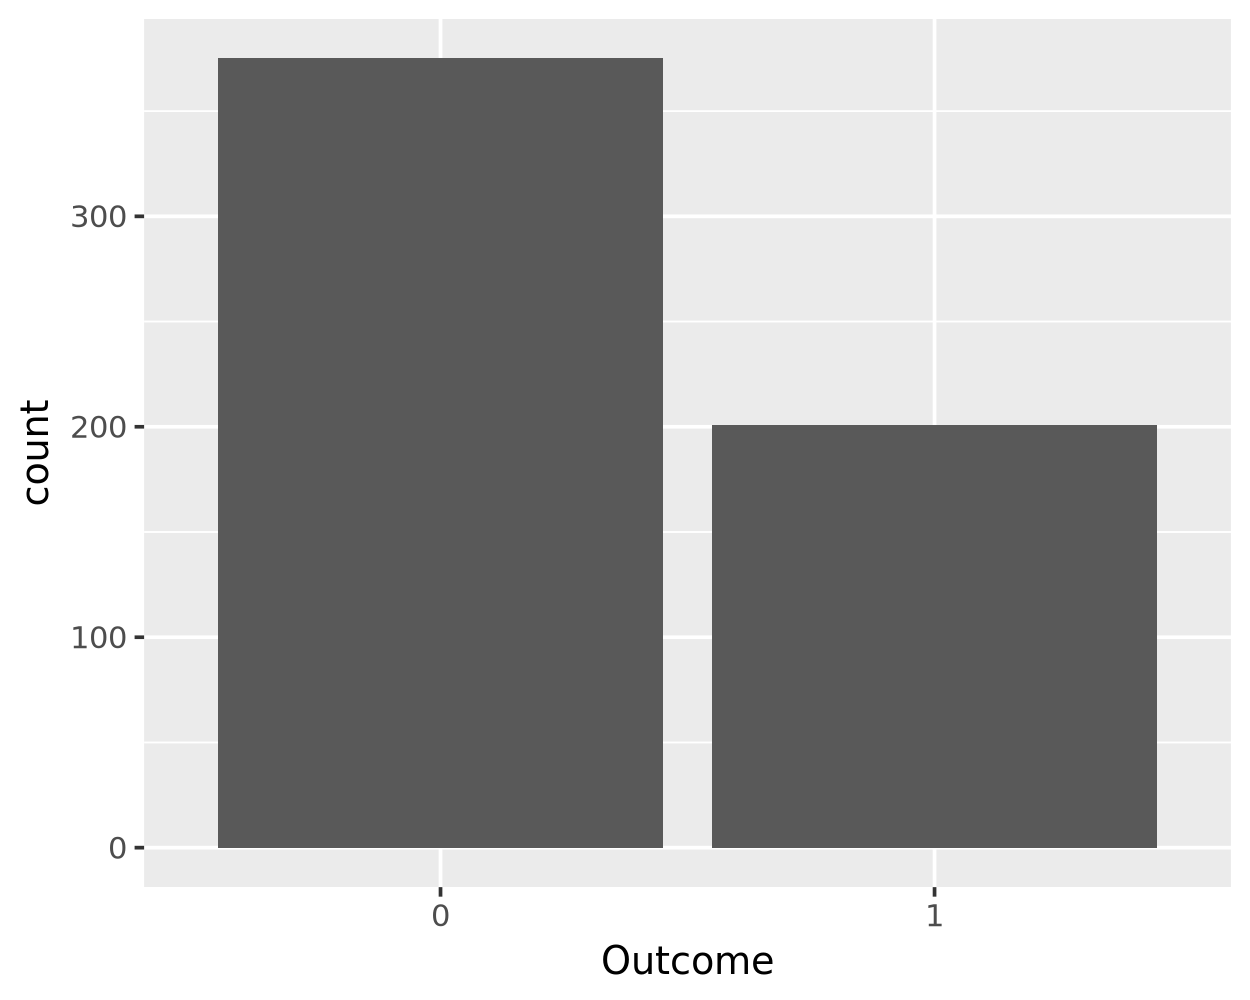

In [5]:
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

We do not have equal counts of eachoutcome. In fact, counts of outcome 1 appear to be roughly half that of outcome 0.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

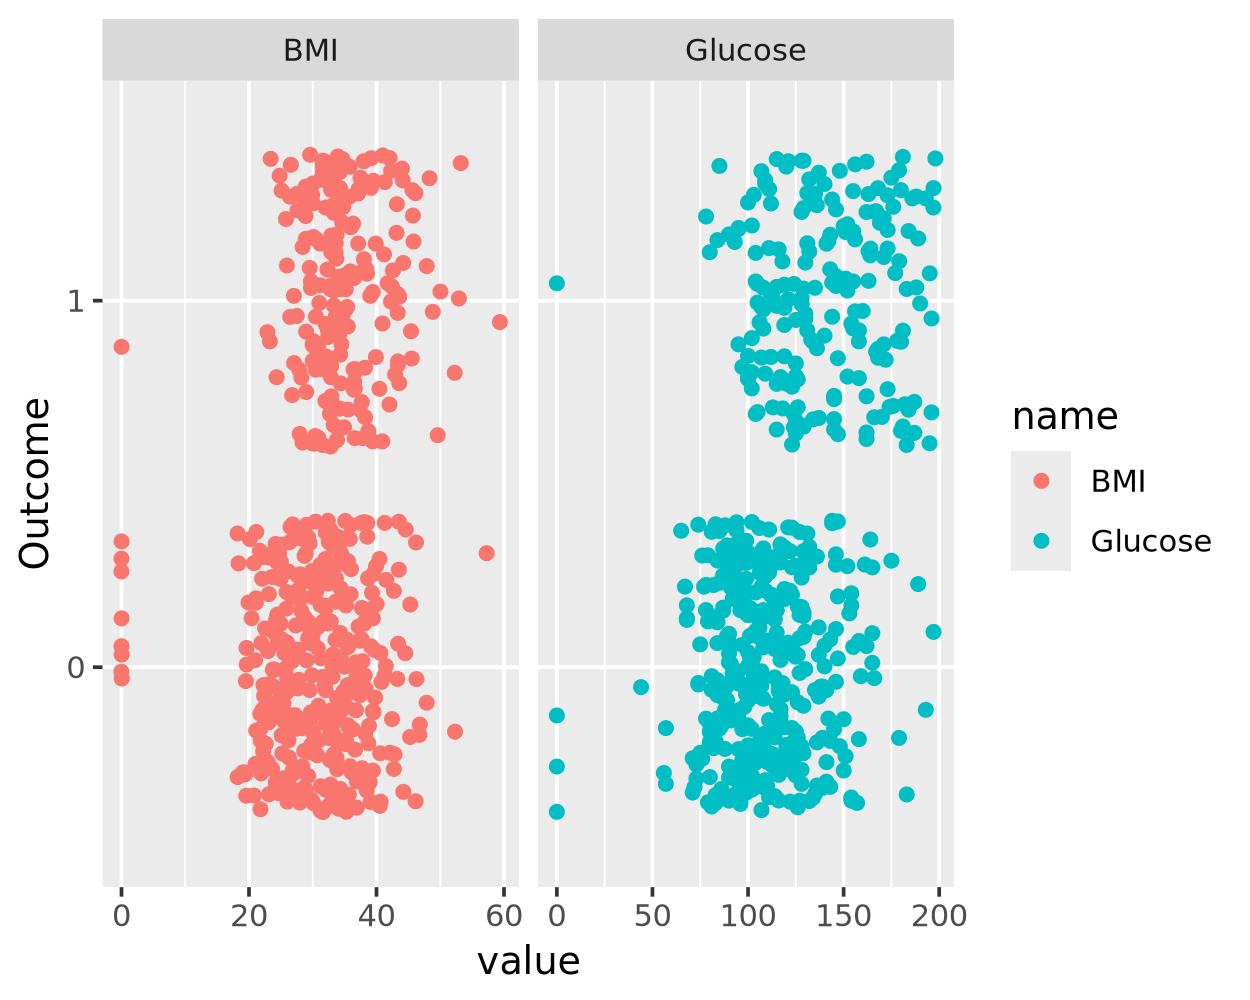

In [16]:
ggplot(plot_df, aes(x = value, y = Outcome, color = name)) + 
  geom_jitter() +
  facet_wrap(~ name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

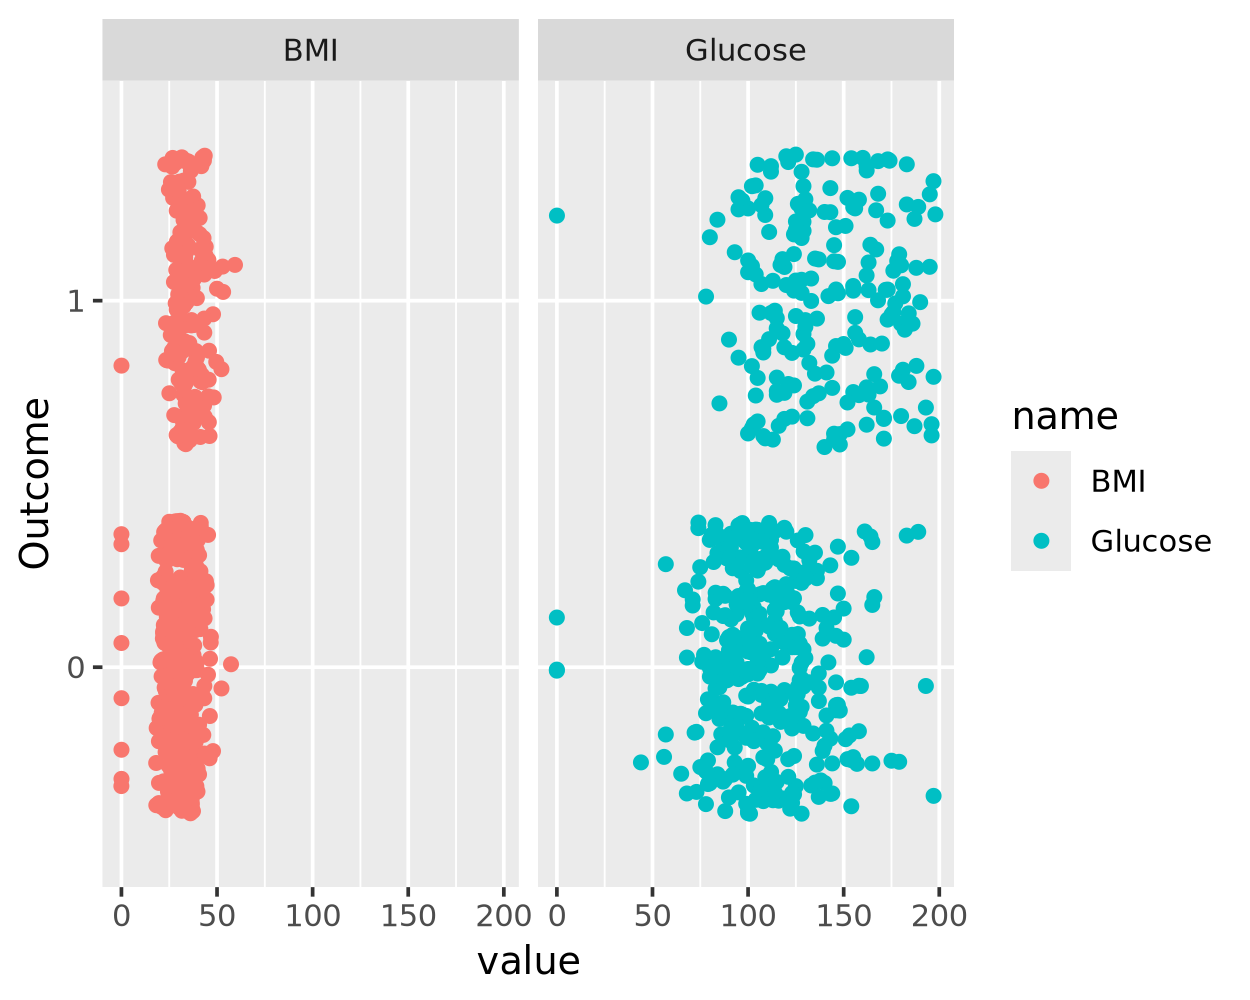

In [17]:
ggplot(plot_df, aes(x = value, y = Outcome, color = name)) + 
  geom_jitter() +
  facet_wrap(~ name, ncol = 2)

As can be seen above, removing scales = 'free_x' from the facet_wrap function results in the left chart for BMI appearing squished. This is because the range of the x axis isn't adjusted in the graph for viewing legibility, instead, both BMI and Glucose use the range of roughly 0 to 200.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [18]:
mod = logistic_reg() |> set_engine('glm') #set up a model and set engine
#then you could build a recipe, but ultimately fit a model
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)
mod_fit |> tidy() #makes it clean looking


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.42228749,0.703897431,-10.544558,5.382518e-26
BMI,0.07172641,0.015474743,4.635063,3.568283e-06
Glucose,0.03593189,0.003839874,9.357570,8.159151e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [29]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test) |> glimpse()


Rows: 192
Columns: 12
$ .pred_class              <fct> 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, …
$ .pred_0                  <dbl> 0.92130086, 0.13658479, 0.94934823, 0.6841406…
$ .pred_1                  <dbl> 0.07869914, 0.86341521, 0.05065177, 0.3158593…
$ Pregnancies              <dbl> 1, 2, 8, 4, 10, 1, 7, 3, 3, 7, 7, 2, 7, 5, 7,…
$ Glucose                  <dbl> 85, 197, 125, 110, 139, 189, 196, 88, 180, 13…
$ BloodPressure            <dbl> 66, 70, 96, 92, 80, 60, 90, 58, 64, 84, 92, 7…
$ SkinThickness            <dbl> 29, 45, 0, 0, 0, 23, 0, 11, 25, 0, 18, 27, 0,…
$ Insulin                  <dbl> 0, 543, 0, 0, 0, 846, 0, 54, 70, 0, 0, 0, 0, …
$ BMI                      <dbl> 26.6, 30.5, 0.0, 37.6, 27.1, 30.1, 39.8, 24.8…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.158, 0.232, 0.191, 1.441, 0.398, 0.4…
$ Age                      <dbl> 31, 53, 54, 30, 57, 59, 41, 22, 26, 37, 48, 2…
$ Outcome                  <fct> 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, …


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [30]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 107  25
         1  18  42

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

Based on the confusion matrix above, there are 25+42=67 inidividuals with diabetes. Of those who actually had diabetes, only 42 received a true positive, ie, they were predicted to have diabetes and actually had diabetes. 18 individuals predicted to have diabetes, did not actually have diabetes.